In [1]:
# Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

x = tf.constant([[0,0],[0,1],[1,0],[1,1]])
print("Matrix Form of x [Input] : \n",x.numpy(),end=' ') # Input
print("\nShape of x: ",x.shape)

y = tf.constant([[0],[0],[0],[1]])
print("Matrix Form of y [Actual Output]: \n",y.numpy(),end=' ') # Actual Output
print("\nShape of y :",y.shape)

def perceptron(x):
    return np.where(x<=0,0,1)

Matrix Form of x [Input] : 
 [[0 0]
 [0 1]
 [1 0]
 [1 1]] 
Shape of x:  (4, 2)
Matrix Form of y [Actual Output]: 
 [[0]
 [0]
 [0]
 [1]] 
Shape of y : (4, 1)


In [2]:
model = keras.Sequential()                                       # Importing Sequential Model in model
model.add(layers.Dense(1,activation='linear',input_shape=(2,)))  # Creating the first layer in the model
model.summary()                                                  # Summarizing the info of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [3]:
print(model.weights)               # weights taken by the Kernel of the Sequential Model (RANDOM)
out = perceptron(model(x))         # getting the output from perceptron function taking the input 'x'
print("Predicted Output : \n",out) # Predicted Output

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[0.7064189],
       [1.2080225]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]
Predicted Output : 
 [[0]
 [1]
 [1]
 [1]]


In [4]:
model.compile(optimizer='adam',loss='mse')                            # Compiling the Model
model.fit(x,y,epochs=30,verbose=1,validation_split=0.2,batch_size=10) # Fitting the Model(epochs: no. of times model is trained)

pred = model.predict(x)
out = perceptron(pred)
print(out)

Train on 3 samples, validate on 1 samples
Epoch 1/30
3/3 [==============================] - 0s 162ms/sample - loss: 0.6528 - val_loss: 0.8307
Epoch 2/30
3/3 [==============================] - 0s 4ms/sample - loss: 0.6502 - val_loss: 0.8253
Epoch 3/30
3/3 [==============================] - 0s 3ms/sample - loss: 0.6477 - val_loss: 0.8198
Epoch 4/30
3/3 [==============================] - 0s 3ms/sample - loss: 0.6452 - val_loss: 0.8144
Epoch 5/30
3/3 [==============================] - 0s 3ms/sample - loss: 0.6426 - val_loss: 0.8090
Epoch 6/30
3/3 [==============================] - 0s 3ms/sample - loss: 0.6401 - val_loss: 0.8036
Epoch 7/30
3/3 [==============================] - 0s 3ms/sample - loss: 0.6376 - val_loss: 0.7983
Epoch 8/30
3/3 [==============================] - 0s 3ms/sample - loss: 0.6351 - val_loss: 0.7929
Epoch 9/30
3/3 [==============================] - 0s 3ms/sample - loss: 0.6326 - val_loss: 0.7876
Epoch 10/30
3/3 [==============================] - 0s 3ms/sample - loss: 0

In [5]:
print(model.weights)

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[0.6766393],
       [1.1781489]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-0.02979729], dtype=float32)>]


In [6]:
class Model(object):
    def __init__(self):         # constructor
        self.w=tf.Variable(5.0) # want to update weights
        self.b=tf.Variable(0.0) # want to update bias
    def __call__(self,x):
        return self.w*x+self.b  # Y = W*X+b
model = Model()
y = model(.5)
print(y.numpy())
# array is mutable and tensor is immutable

2.5


In [7]:
# Mean Seuqre Error
def loss(y_pred,y_actual):
    return tf.reduce_mean(tf.square(y_pred-y_actual))

Shape of x [input] :  (1000,) 



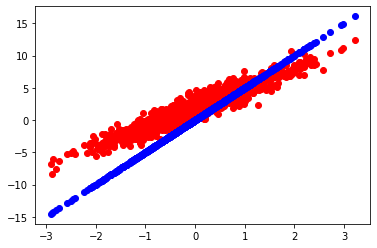


current loss is : 8.271033


In [8]:
# Data
num_samples = 1000

x = tf.random.normal(shape=[num_samples])     # random 1000 samples
noise = tf.random.normal(shape=[num_samples]) # noise in data random

print("Shape of x [input] : ",x.shape,"\n")

true_w = 3
true_b = 2

y_actual = true_w*x + true_b + noise

# scatter plot using matplotlib for the model visualization
plt.scatter(x,y_actual,c='r')
plt.scatter(x,model(x),c='b')
plt.show()

print('\ncurrent loss is :',loss(y_actual,model(x)).numpy())